**problem statement:** The contents that MOVIE recommender system display in front of the users are really likeable by the users or not.

# importing the required libraries


In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [57]:
df = pd.read_csv('data/netflix_reviews.csv')
pd.set_option('display.max_columns', None)
df.head(2)

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
0,7dfb1f90-f185-4e81-a97f-d38f0128e5a4,Maxwell Ntloko,Good,5,1,NaN,2024-06-26 15:38:06,NaN
1,3009acc4-8554-41cf-88de-cc5e2f6e45b2,Dilhani Mahanama,👍👍,5,0,NaN,2024-06-24 15:29:54,NaN


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113609 entries, 0 to 113608
Data columns (total 8 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   reviewId              113609 non-null  object
 1   userName              113607 non-null  object
 2   content               113607 non-null  object
 3   score                 113609 non-null  int64 
 4   thumbsUpCount         113609 non-null  int64 
 5   reviewCreatedVersion  96971 non-null   object
 6   at                    113609 non-null  object
 7   appVersion            96971 non-null   object
dtypes: int64(2), object(6)
memory usage: 6.9+ MB


In [59]:
df.reviewCreatedVersion.value_counts()

reviewCreatedVersion
7.84.1 build 28 35243     1907
8.96.1 build 16 50568     1854
7.38.0 build 27 34635     1700
8.104.0 build 5 50619     1236
8.105.0 build 15 50626    1197
                          ... 
6.11.0 build 29550           1
5.9.0 build 24855            1
3.9.2 build 4278             1
8.112.0 build 2 50661        1
8.106.0 build 7 50630        1
Name: count, Length: 557, dtype: int64

In [60]:
df.appVersion.value_counts()

appVersion
7.84.1 build 28 35243     1907
8.96.1 build 16 50568     1854
7.38.0 build 27 34635     1700
8.104.0 build 5 50619     1236
8.105.0 build 15 50626    1197
                          ... 
6.11.0 build 29550           1
5.9.0 build 24855            1
3.9.2 build 4278             1
8.112.0 build 2 50661        1
8.106.0 build 7 50630        1
Name: count, Length: 557, dtype: int64

**Here removing some unusable column fro our targated model**
# feature engineering

In [61]:
df.drop(['reviewCreatedVersion','at','appVersion','userName'],axis='columns',inplace=True)
df.columns

Index(['reviewId', 'content', 'score', 'thumbsUpCount'], dtype='object')

In [62]:
df.isna().sum()

reviewId         0
content          2
score            0
thumbsUpCount    0
dtype: int64

In [63]:
df.dropna(inplace=True)

In [64]:
df.duplicated().sum()

309

In [65]:
df.drop_duplicates()
df.shape

(113607, 4)

**Distribution of score and Thumbs up count**

In [66]:

import plotly.graph_objects as go
from plotly.subplots import make_subplots

score = df.score.value_counts()
thumbs = df.thumbsUpCount.value_counts().head(7)


# Create subplots
fig = make_subplots(rows=1, cols=2, specs=[[{'type': 'domain'}, {'type': 'domain'}]])

# Add both pie charts to the figure
fig.add_trace(go.Pie(labels=score.index, values=score.values, name="Score distribution"), 1, 1)
fig.add_trace(go.Pie(labels=thumbs.index, values=thumbs.values, name="Thumbs up count"), 1, 2)

# Customize the charts (optional)
fig.update_traces(hole=0.4, hoverinfo="label+percent+name")

# Set subplot titles
fig.update_layout(title_text="Distribution of Values")

# Show the figure
fig.show()


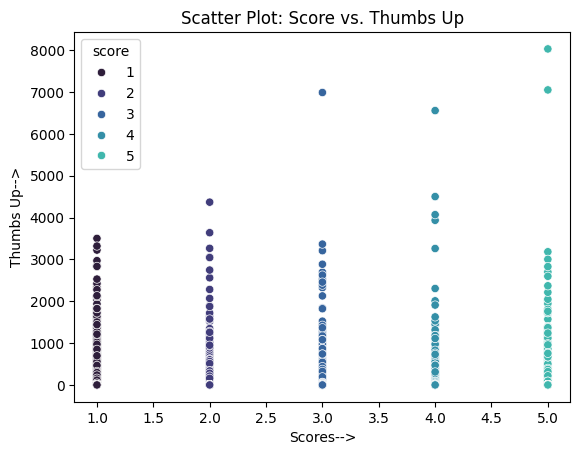

In [67]:
# Create a scatter plot

palette = sns.color_palette("mako", as_cmap=False)
sns.scatterplot(x="score", y="thumbsUpCount", data=df,hue="score",palette=palette)
plt.xlabel("Scores-->")
plt.ylabel("Thumbs Up-->")
plt.title("Scatter Plot: Score vs. Thumbs Up")
plt.show()

<Axes: >

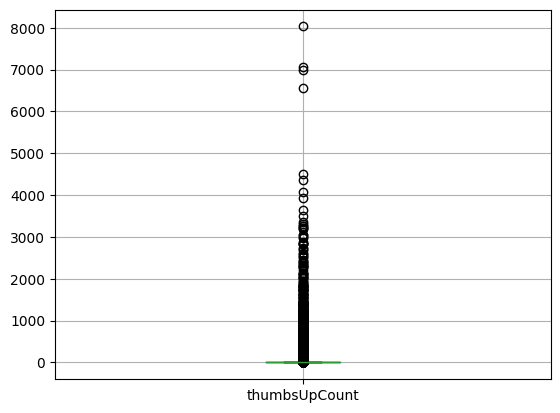

In [68]:
df.boxplot(column=['thumbsUpCount'])


# outlier removal
**using IQR**

In [69]:
df.thumbsUpCount.describe()

count    113607.00000
mean         10.43500
std         101.01473
min           0.00000
25%           0.00000
50%           0.00000
75%           1.00000
max        8032.00000
Name: thumbsUpCount, dtype: float64

In [70]:
df = df[df.thumbsUpCount <= df.thumbsUpCount.quantile(0.92)]

<Axes: >

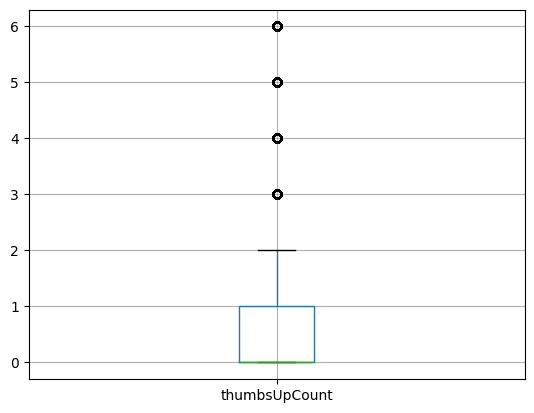

In [71]:
df.boxplot(column=['thumbsUpCount'])

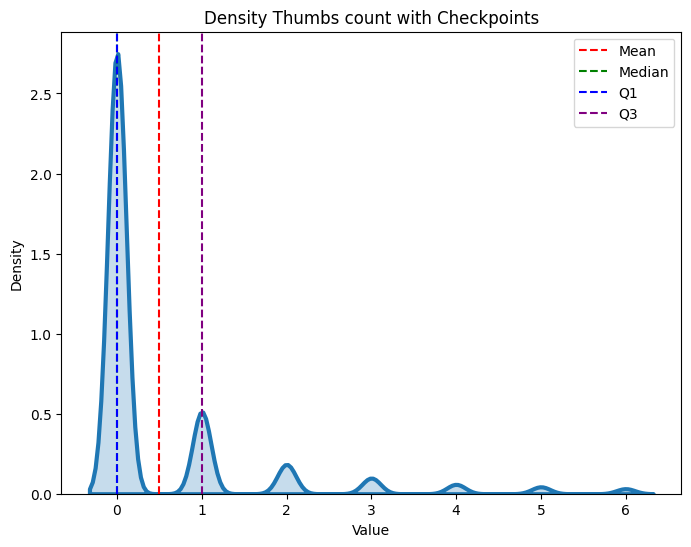

In [73]:
# Assuming 'data' is your skewed column
plt.figure(figsize=(8, 6))
sns.distplot(df.thumbsUpCount, hist=False, kde_kws={"shade": True, "linewidth": 3})
plt.axvline(df.thumbsUpCount.mean(), color='red', linestyle='--', label='Mean')
plt.axvline(df.thumbsUpCount.median(), color='green', linestyle='--', label='Median')
plt.axvline(df.thumbsUpCount.quantile(0.25), color='blue', linestyle='--', label='Q1')
plt.axvline(df.thumbsUpCount.quantile(0.75), color='purple', linestyle='--', label='Q3')
plt.title('Density Thumbs count with Checkpoints')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()


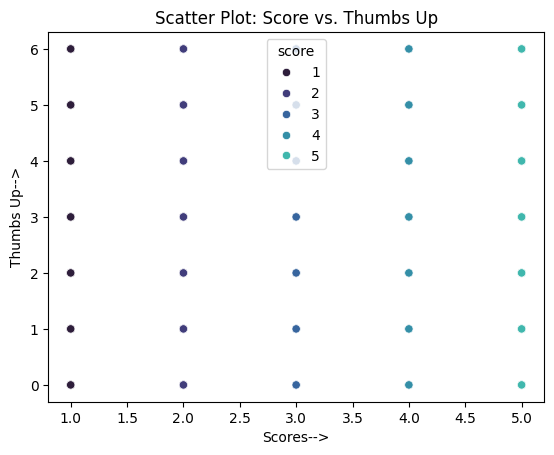

In [74]:
palette = sns.color_palette("mako", as_cmap=False)
sns.scatterplot(x="score", y="thumbsUpCount", data=df,hue="score",palette=palette)
plt.xlabel("Scores-->")
plt.ylabel("Thumbs Up-->")
plt.title("Scatter Plot: Score vs. Thumbs Up")
plt.show()